## Loading Images

SAM's predictor.set_image function expects the following format for the image:

Arguments:
      image (np.ndarray): The image for calculating masks. Expects an
        image in HWC uint8 format, with pixel values in [0, 255].
      image_format (str): The color format of the image, in ['RGB', 'BGR'].

In [1]:
# load png image into numpy array
import numpy as np
from PIL import Image

path = "/Users/janulm/Documents/ETH/SM10/Computational Intelligence Lab/eth-cil-road-segmentation/data/training/images/satimage_0.png"

im_frame = Image.open(path)
im_frame = im_frame.convert('RGB')
np_frame = np.array(im_frame)


In [2]:
print(np_frame.shape, np_frame.dtype, np_frame.min(), np_frame.max())

(400, 400, 3) uint8 15 252


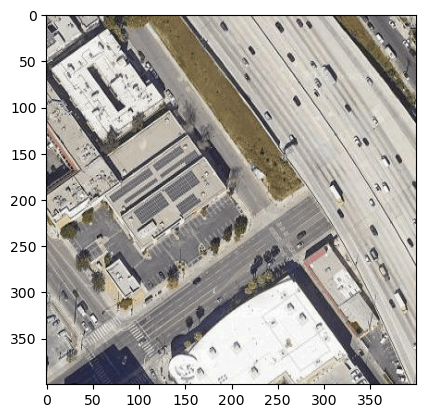

In [3]:
# show the image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(np_frame)
plt.show()

## Prompt

In [5]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator

model_path = "/Users/janulm/Documents/ETH/SM10/Computational Intelligence Lab/eth-cil-road-segmentation/models/sam_vit_h_4b8939.pth"
sam = sam_model_registry["default"](checkpoint=model_path)



# all masks
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(np_frame)

print(masks)

126


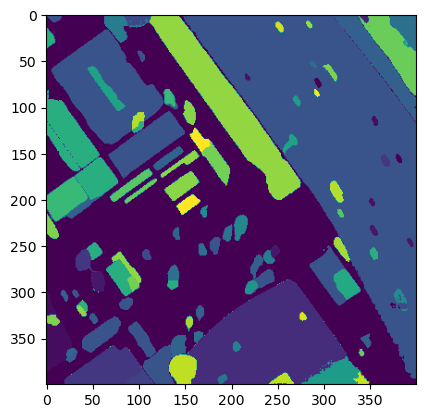

In [22]:

# show the mask using matplotlib
#plt.imshow(masks)
#plt.show()
print(len(masks))

def mask_to_image(masks):
    # add all the masks with a different color together and show them as one image
    mask = np.zeros_like(masks[0]["segmentation"])
    i = len(masks) + 10
    for m in masks:
        # convert the binary {true,false} mask to {0,1} mask
        m["segmentation"] = i * m["segmentation"].astype(np.uint8)
        i-=1
        mask += m["segmentation"]
    return mask



mask = mask_to_image(masks)
plt.imshow(mask)



## All masks

In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["<model_type>"](checkpoint="<path/to/checkpoint>")
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(<your_image>)